In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from rerf.urerf import UnsupervisedRandomForest

In [39]:
data =make_blobs(n_samples=100, 
                 n_features=5, 
                 centers=3, 
                 cluster_std=1.0, 
                 center_box=(-10.0, 10.0), 
                 shuffle=True, 
                 random_state=2)

In [40]:
X = data[0]
Y = data[1]

In [41]:
X

array([[ -3.85776519,  -5.58634992,   2.24664356,  -2.77768224,
         -4.56023272],
       [ -2.44800221,  -8.4014118 ,  -2.49856474,  -0.02350367,
         -2.08185885],
       [ -4.89871732,  -6.20197623,   2.34690116,  -4.78355615,
         -4.90772863],
       [ -4.29518503,  -5.55526194,   1.67372655,  -5.37623417,
         -3.61340367],
       [  3.70793196,   0.90366028,  -8.58336353,   1.32005276,
         -4.58599958],
       [ -3.9231864 ,  -7.02793598,   1.80104821,  -4.78149362,
         -4.66934481],
       [ -3.8903152 ,  -4.96739029,   2.92246674,  -3.10473729,
         -4.06769987],
       [  1.49770852,   0.02104541,  -7.68567878,   0.99268184,
         -7.0419684 ],
       [  1.83031684,  -0.14471643,  -5.95740442,   0.93302493,
         -4.46092219],
       [ -1.946242  , -10.52090393,   1.80912894,  -1.32072065,
         -1.61450709],
       [  0.74812467,   0.96150058,  -7.95971429,  -0.67482671,
         -6.37017949],
       [  2.03348283,   1.02484674,  -7.561

In [42]:
clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)

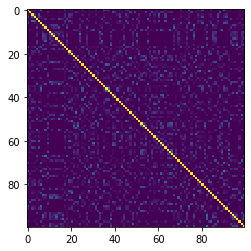

In [43]:
clf.fit(X)
sim_mat = clf.transform()
plt.imshow(sim_mat)

In [44]:
R = []
I = []
for i in range(1,11):
    I.append(i)
    cluster = KMeans(n_clusters= i)
    predict_labels = cluster.fit_predict(sim_mat)
    score = adjusted_rand_score(Y, predict_labels)
    R.append(score)

    #print("labels\n", Y)
    #print("predict\n", predict_labels)
    #print("Adjusted Rand Score:", score)
    

2

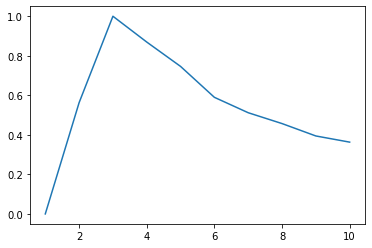

In [45]:
plt.plot(I,R)
max_R = max(R)
max_I = I[int(max_R)]
max_I


2

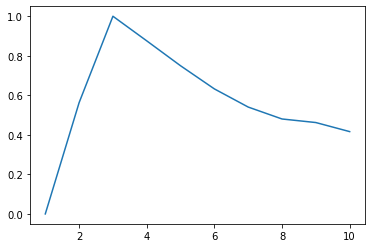

In [59]:
from sklearn.cluster import AgglomerativeClustering

data = make_blobs(n_samples=100, 
                 n_features=5, 
                 centers=3, 
                 cluster_std=1.0, 
                 center_box=(-10.0, 10.0), 
                 shuffle=True, 
                 random_state=2)

X = data[0]
Y = data[1]

clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)

clf.fit(X)
sim_mat = clf.transform()
#plt.imshow(sim_mat)

K = []
O = []
for i in range (1,11):
    O.append(i)
    cluster = AgglomerativeClustering(n_clusters=i, 
                                      memory=None, 
                                      connectivity=None)
    predict_labels = cluster.fit_predict(sim_mat)
    score = adjusted_rand_score(Y, predict_labels)
    K.append(score)

plt.plot(O,K)
max_R = max(R)
max_I = I[int(max_R)]
max_I

/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/cluster/affinity_propagation_.py:224: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)
/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/cluster/affinity_propagation_.py:224: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


Adjusted Rand Score: 0.0


/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/cluster/affinity_propagation_.py:224: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


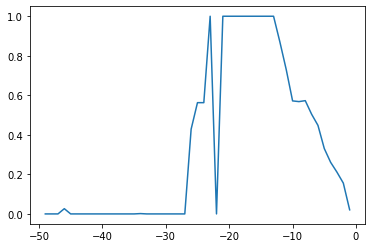

In [68]:
from sklearn.cluster import AffinityPropagation

data = make_blobs(n_samples=100, 
                 n_features=5, 
                 centers=3, 
                 cluster_std=1.0, 
                 center_box=(-10.0, 10.0), 
                 shuffle=True, 
                 random_state=2)

X = data[0]
Y = data[1]

clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)

clf.fit(X)
sim_mat = clf.transform()
#plt.imshow(sim_mat)

R = []
I = []
for i in range(-1,-50,-1):
    I.append(i)
    cluster = AffinityPropagation(preference= i)
    predict_labels = cluster.fit_predict(sim_mat)
    score = adjusted_rand_score(Y, predict_labels)
    R.append(score)

plt.plot(I,R)
#print("labels\n", iris.target)
#print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)

/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/home/da_pj/anaconda3/lib/python3.7/site-pa

Adjusted Rand Score: 0.382197473774989


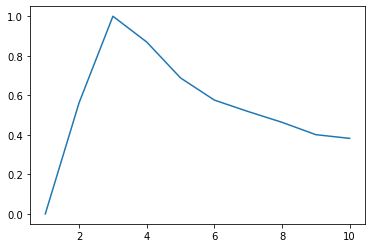

In [70]:
from sklearn.cluster import SpectralClustering

data = make_blobs(n_samples=100, 
                 n_features=5, 
                 centers=3, 
                 cluster_std=1.0, 
                 center_box=(-10.0, 10.0), 
                 shuffle=True, 
                 random_state=2)

X = data[0]
Y = data[1]

clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)

clf.fit(X)
sim_mat = clf.transform()
#plt.imshow(sim_mat)

R = []
I = []
for i in range(1,11):
    I.append(i)
    cluster = SpectralClustering(n_clusters = i, 
                                  eigen_solver=None, 
                                  random_state=None, 
                                  n_init=10, gamma=1.0, 
                                  n_neighbors=10, 
                                  eigen_tol=0.0, 
                                  degree=3, coef0=1, kernel_params=None, n_jobs=None)
    predict_labels = cluster.fit_predict(sim_mat)
    score = adjusted_rand_score(Y, predict_labels)
    R.append(score)

plt.plot(I,R)
print("Adjusted Rand Score:", score)